In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pytz
import numpy as np

In [17]:
path_to_ch4_diffusive = 'AK_CH4_diffusive_20250302_LAKE.csv'
path_to_ch4_ebullitive = 'AK_CH4_ebullitive_20250302_LAKE.csv'
path_to_co2_diffusive = 'AK_CO2_diffusive_20250302_LAKE.csv'
path_to_co2_ebullitive = 'AK_CO2_ebullitive_20250302_LAKE.csv'

ch4_diffusive = pd.read_csv(path_to_ch4_diffusive, parse_dates=['datetime_start','datetime_end'])
ch4_ebullitive = pd.read_csv(path_to_ch4_ebullitive, parse_dates=['datetime_start','datetime_end'])
co2_diffusive = pd.read_csv(path_to_co2_diffusive, parse_dates=['datetime_start','datetime_end'])
co2_ebullitive = pd.read_csv(path_to_co2_ebullitive, parse_dates=['datetime_start','datetime_end'])

In [18]:
ch4_diffusive

,flux,chamber,pond,datetime_start,datetime_end,slope_ppm_hr,n_obs_included_in_lm,r2,air_temp,sur_wat_temp,range,umol_m2_hr,mmol_m2_hr,date,time,time24,time_elapsed
0,1,1,B,2024-07-04 00:01:00,2024-07-04 00:10:00,1.164844,20,0.344513,15.835000,15.241500,NaN,16.844821,0.016845,7/4/24,0:01:19,0.016667,9.433333
1,2,1,B,2024-07-04 00:22:00,2024-07-04 00:35:00,4.228117,28,0.705888,14.867857,15.118929,NaN,61.348132,0.061348,7/4/24,0:22:28,0.366667,13.400000
2,3,1,B,2024-07-04 00:47:00,2024-07-04 01:01:00,4.668966,28,0.650499,15.425000,15.032143,NaN,67.613864,0.067614,7/4/24,0:47:36,0.783333,13.400000
3,4,1,B,2024-07-04 01:12:00,2024-07-04 01:26:00,3.785920,28,0.583055,15.310714,14.933571,NaN,54.847715,0.054848,7/4/24,1:12:43,1.200000,13.400000
4,5,1,B,2024-07-04 01:37:00,2024-07-04 01:51:00,3.861251,28,0.572644,15.007143,14.813214,NaN,55.997996,0.055998,7/4/24,1:37:51,1.616667,13.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9246,1500,6,U,2024-09-08 01:32:00,2024-09-08 02:29:00,22.948074,117,0.947059,11.253846,11.100684,NaN,337.197671,0.337198,9/8/24,1:32:03,1.533333,57.683333
9247,1501,6,U,2024-09-08 02:42:00,2024-09-08 03:40:00,19.701465,117,0.942718,10.917949,11.020513,NaN,289.834498,0.289834,9/8/24,2:42:28,2.700000,57.666667
9248,1502,6,U,2024-09-08 03:52:00,2024-09-08 04:50:00,13.084823,117,0.911970,10.647863,10.960171,NaN,192.678177,0.192678,9/8/24,3:52:52,3.866667,57.666667
9249,1503,6,U,2024-09-08 05:03:00,2024-09-08 06:00:00,13.664638,117,0.953402,10.452991,10.916325,NaN,201.354394,0.201354,9/8/24,5:03:16,5.050000,57.683333


In [19]:
#ch4_diffusive['datetime_start'] = ch4_diffusive['datetime_start'].dt.tz_localize(pytz.timezone('Etc/GMT+8'))
#ch4_diffusive['datetime_start'] = ch4_diffusive['datetime_start'].dt.tz_convert(pytz.timezone('Etc/GMT+9'))

In [20]:
# calculate daily fluxes for CH4 diffusion
ch4_diffusive.loc[ch4_diffusive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan

ch4_diffusive['date'] = ch4_diffusive['datetime_end'].dt.date

ch4_diffusive_daily = ch4_diffusive.groupby(by=['pond', 'chamber', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                }).reset_index()

ch4_diffusive_daily['umol_m2_d'] = ch4_diffusive_daily['umol_m2_hr'] * 24
ch4_diffusive_daily['mg_m2_d'] = ch4_diffusive_daily['umol_m2_d']*0.01604

ch4_diffusive_daily_chamber_avg = ch4_diffusive_daily.groupby(by=['pond', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'mg_m2_d': 'mean', #mm
                                                }).reset_index()

In [21]:
# calculate daily fluxes for CH4 ebullition
ch4_ebullitive.loc[ch4_ebullitive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
ch4_ebullitive['date'] = ch4_ebullitive['datetime_end'].dt.date

ch4_ebullitive_daily = ch4_ebullitive.groupby(by=['pond', 'chamber', 'date']).aggregate({ 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                }).reset_index()

ch4_ebullitive_daily['umol_m2_d'] = ch4_ebullitive_daily['umol_m2_hr'] * 24
ch4_ebullitive_daily['mg_m2_d'] = ch4_ebullitive_daily['umol_m2_d']*0.01604

In [22]:
# calculate daily fluxes for CO2 diffusion
co2_diffusive.loc[co2_diffusive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan

co2_diffusive['date'] = co2_diffusive['datetime_end'].dt.date

co2_diffusive_daily = co2_diffusive.groupby(by=['pond', 'chamber', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                }).reset_index()

co2_diffusive_daily['umol_m2_d'] = co2_diffusive_daily['umol_m2_hr'] * 24
co2_diffusive_daily['mg_m2_d'] = co2_diffusive_daily['umol_m2_d']*0.04401

co2_diffusive_daily_chamber_avg = co2_diffusive_daily.groupby(by=['pond', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'mg_m2_d': 'mean', #mm
                                                }).reset_index()

In [23]:
# calculate daily fluxes for CO2 ebullition
co2_ebullitive.loc[co2_ebullitive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
co2_ebullitive['date'] = co2_ebullitive['datetime_end'].dt.date

co2_ebullitive_daily = co2_ebullitive.groupby(by=['pond', 'chamber', 'date']).aggregate({ 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                }).reset_index()

co2_ebullitive_daily['umol_m2_d'] = co2_ebullitive_daily['umol_m2_hr'] * 24
co2_ebullitive_daily['mg_m2_d'] = co2_ebullitive_daily['umol_m2_d']*0.04401

In [24]:
df_all_ch4 =pd.merge(ch4_diffusive_daily, ch4_ebullitive_daily, on =['pond', 'chamber', 'date'], suffixes=['_diff', '_ebul'], how='outer')
df_all_ch4 = df_all_ch4.replace('B', 'burned')
df_all_ch4 = df_all_ch4.replace('U', 'unburned')


df_all_co2 =pd.merge(co2_diffusive_daily, co2_ebullitive_daily, on =['pond', 'chamber', 'date'], suffixes=['_diff', '_ebul'], how='outer')
df_all_co2 = df_all_co2.replace('B', 'burned')
df_all_co2 = df_all_co2.replace('U', 'unburned')

df_all = pd.merge(df_all_ch4, df_all_co2, on =['pond', 'chamber', 'date'], suffixes=['_ch4', '_co2'], how='outer')
df_all.to_csv('auto_fluxes_all.csv')

In [25]:
# calculate daily fluxes for CO2 ebullition
co2_ebullitive.loc[co2_ebullitive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan

co2_ebullitive['date'] = co2_ebullitive['datetime_end'].dt.date

co2_ebullitive_daily = co2_ebullitive.groupby(by=['pond', 'chamber', 'date']).aggregate({ 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                }).reset_index()

co2_ebullitive_daily['umol_m2_d'] = co2_ebullitive_daily['umol_m2_hr'] * 24
co2_ebullitive_daily['mg_m2_d'] = co2_ebullitive_daily['umol_m2_d']*0.01604

In [26]:
ch4_diffusive_daily['pond'].unique()

array(['B', 'U'], dtype=object)

Text(0.5, 0.98, 'CH4 Diffusive Flux: Pond B and Pond U Over Time')

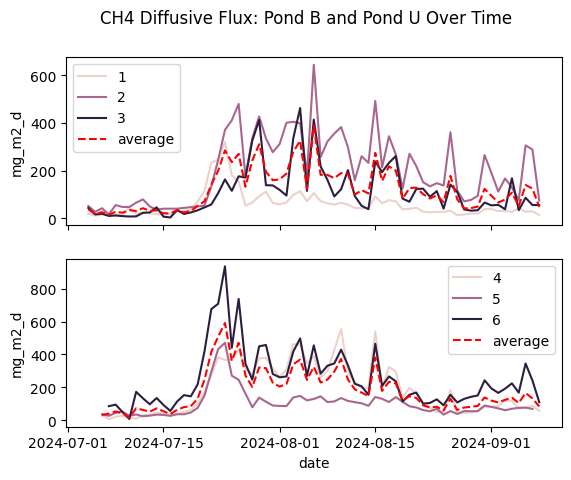

In [27]:
fig, axes=plt.subplots(2,1, sharex=True)

sns.lineplot(data=ch4_diffusive_daily.loc[ch4_diffusive_daily['pond']=='B'], x='date', y='mg_m2_d', hue='chamber', ax=axes[0])
sns.lineplot(data = ch4_diffusive_daily_chamber_avg.loc[ch4_diffusive_daily_chamber_avg['pond']=='B'], x='date', y='mg_m2_d', ax=axes[0], color='red', linestyle='--', label='average')

sns.lineplot(data=ch4_diffusive_daily.loc[ch4_diffusive_daily['pond']=='U'], x='date', y='mg_m2_d', hue='chamber', ax=axes[1])
sns.lineplot(data = ch4_diffusive_daily_chamber_avg.loc[ch4_diffusive_daily_chamber_avg['pond']=='U'], x='date', y='mg_m2_d', ax=axes[1], color='red', linestyle='--', label='average')
fig.suptitle('CH4 Diffusive Flux: Pond B and Pond U Over Time')

Text(0.5, 0.98, 'CH4 Ebullitive Flux: Pond B and Pond U Over Time')

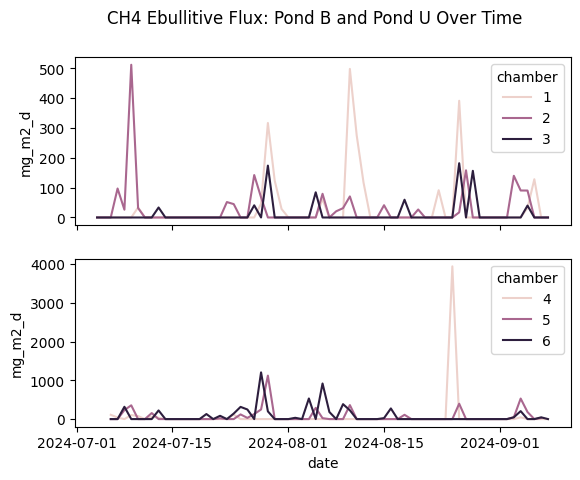

In [28]:
fig, axes=plt.subplots(2,1, sharex=True)
sns.lineplot(data=ch4_ebullitive_daily.loc[ch4_ebullitive_daily['pond']=='B'], x='date', y='mg_m2_d', hue='chamber', ax=axes[0])
sns.lineplot(data=ch4_ebullitive_daily.loc[ch4_ebullitive_daily['pond']=='U'], x='date', y='mg_m2_d', hue='chamber', ax=axes[1])
fig.suptitle('CH4 Ebullitive Flux: Pond B and Pond U Over Time')

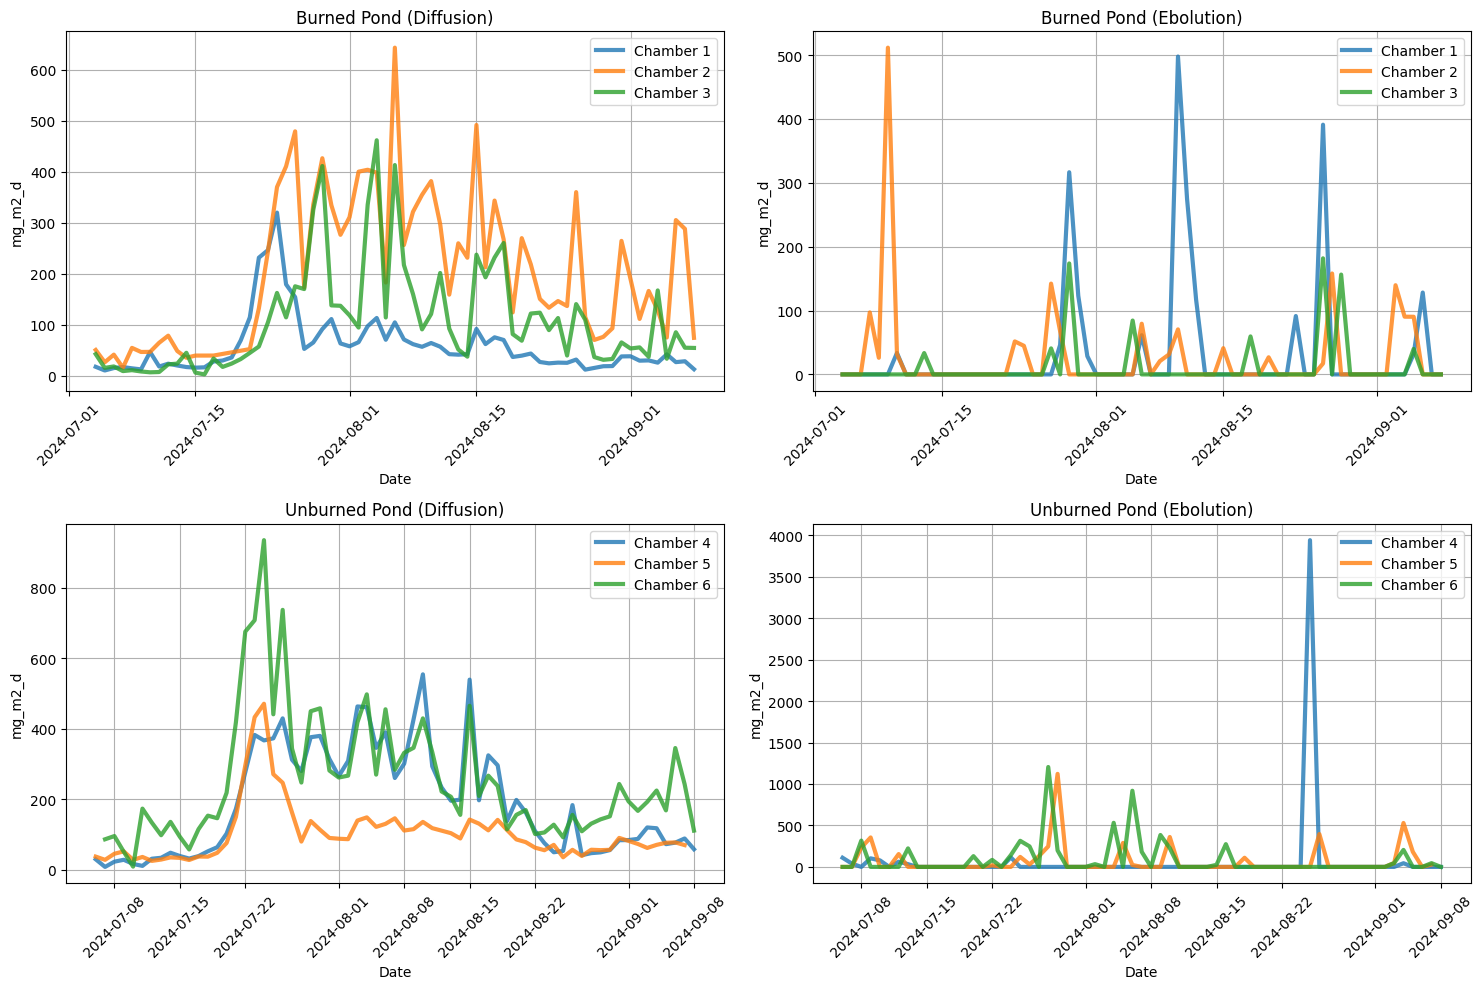

In [30]:
def plot_fluxes_subplots(data_d,data_e):
    # Convert 'date' column to datetime format for proper plotting
    data_d['date'] = pd.to_datetime(data_d['date'], errors='coerce')
    data_e['date'] = pd.to_datetime(data_e['date'], errors='coerce')

    # Define filters for the plots
    filter_d_B1 = (data_d['pond'] == 'B') & (data_d['chamber'] == 1)
    filter_d_B2 = (data_d['pond'] == 'B') & (data_d['chamber'] == 2)
    filter_d_B3 = (data_d['pond'] == 'B') & (data_d['chamber'] == 3)

    filter_e_B1 = (data_e['pond'] == 'B') & (data_e['chamber'] == 1)
    filter_e_B2 = (data_e['pond'] == 'B') & (data_e['chamber'] == 2)
    filter_e_B3 = (data_e['pond'] == 'B') & (data_e['chamber'] == 3)

    filter_d_U4 = (data_d['pond'] == 'U') & (data_d['chamber'] == 4)
    filter_d_U5 = (data_d['pond'] == 'U') & (data_d['chamber'] == 5)
    filter_d_U6 = (data_d['pond'] == 'U') & (data_d['chamber'] == 6)

    filter_e_U4 = (data_e['pond'] == 'U') & (data_e['chamber'] == 4)
    filter_e_U5 = (data_e['pond'] == 'U') & (data_e['chamber'] == 5)
    filter_e_U6 = (data_e['pond'] == 'U') & (data_e['chamber'] == 6)

    # Create subplots (2x2)
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot for Pond B (Chamber 1, 2, and 3)
    axes[0, 0].plot(data_d[filter_d_B1]['date'], data_d[filter_d_B1]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 1')
    axes[0, 0].plot(data_d[filter_d_B2]['date'], data_d[filter_d_B2]['mg_m2_d'],lw='3', alpha=0.8,linestyle='-', label='Chamber 2')
    axes[0, 0].plot(data_d[filter_d_B3]['date'], data_d[filter_d_B3]['mg_m2_d'],lw='3', alpha=0.8,linestyle='-', label='Chamber 3')
    axes[0, 0].set_title("Burned Pond (Diffusion)")
    axes[0, 0].set_xlabel("Date")
    axes[0, 0].set_ylabel("mg_m2_d")
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Plot for Pond B (Chamber 1, 2, and 3)
    axes[0, 1].plot(data_e[filter_e_B1]['date'], data_e[filter_e_B1]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 1')
    axes[0, 1].plot(data_e[filter_e_B2]['date'], data_e[filter_e_B2]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 2')
    axes[0, 1].plot(data_e[filter_e_B3]['date'], data_e[filter_e_B3]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 3')
    #axes[0, 1].plot(data[filter_U4]['date'], data[filter_U4]['mg_m2_d'], marker='o', linestyle='-', label='Chamber 4')
    axes[0, 1].set_title("Burned Pond (Ebolution)")
    axes[0, 1].set_xlabel("Date")
    axes[0, 1].set_ylabel("mg_m2_d")
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Plot for Pond U (Chamber 5)
    axes[1, 0].plot(data_d[filter_d_U4]['date'], data_d[filter_d_U4]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 4')
    axes[1, 0].plot(data_d[filter_d_U5]['date'], data_d[filter_d_U5]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 5')
    axes[1, 0].plot(data_d[filter_d_U6]['date'], data_d[filter_d_U6]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 6')
 
    axes[1, 0].set_title("Unburned Pond (Diffusion)")
    axes[1, 0].set_xlabel("Date")
    axes[1, 0].set_ylabel("mg_m2_d")
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Plot for Pond U (Chamber 6)
    axes[1, 1].plot(data_e[filter_e_U4]['date'], data_e[filter_e_U4]['mg_m2_d'], lw='3', alpha=0.8,linestyle='-', label='Chamber 4')
    axes[1, 1].plot(data_e[filter_e_U5]['date'], data_e[filter_e_U5]['mg_m2_d'], lw='3', alpha=0.8,linestyle='-', label='Chamber 5')
    axes[1, 1].plot(data_e[filter_e_U6]['date'], data_e[filter_e_U6]['mg_m2_d'], lw='3', alpha=0.8,linestyle='-', label='Chamber 6')
    axes[1, 1].set_title("Unburned Pond (Ebolution)")
    axes[1, 1].set_xlabel("Date")
    axes[1, 1].set_ylabel("mg_m2_d")
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    axes[1, 1].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with the loaded data
plot_fluxes_subplots(ch4_diffusive_daily,ch4_ebullitive_daily)


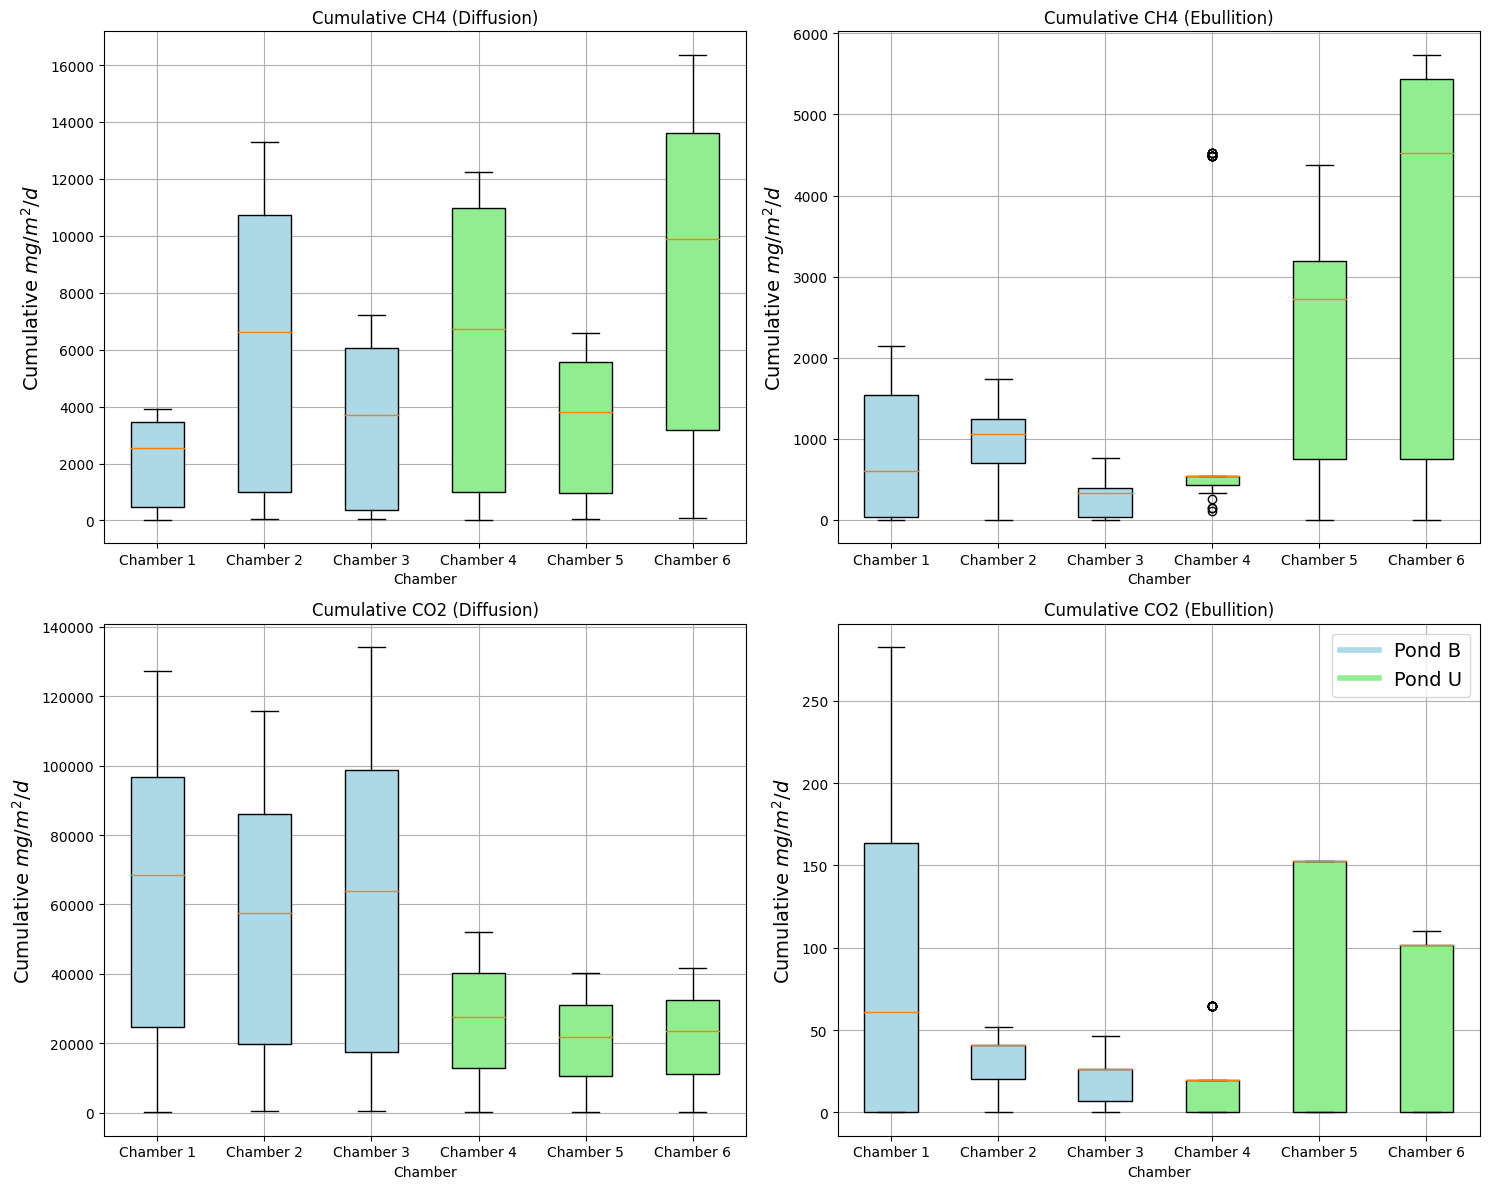

In [31]:
# Define a function to create 2x2 subplots using the existing plot_cumulative_boxplot_with_legend logic for multiple datasets
def plot_cumulative_boxplot_2x2(data_list, titles):
    # Set up a 2x2 subplot layout
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    pond_B_color = 'lightblue'
    pond_U_color = 'lightgreen'
    
    # Iterate over the subplots and datasets
    for ax, data, title in zip(axes.flatten(), data_list, titles):
        # Convert 'date' column to datetime format for proper sorting and aggregation
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
        
        # Define lists to hold cumulative data and labels for each pond and chamber
        pond_B_chambers = [1, 2, 3]
        pond_U_chambers = [4, 5, 6]

        cumulative_data = []
        labels = []
        colors = []

        # Collect cumulative data and labels for Pond 'B'
        for chamber in pond_B_chambers:
            chamber_data = data[(data['pond'] == 'B') & (data['chamber'] == chamber)].sort_values(by='date')
            chamber_data['cumulative_mg_m2_d'] = chamber_data['mg_m2_d'].cumsum()
            cumulative_data.append(chamber_data['cumulative_mg_m2_d'].dropna())
            labels.append(f"Chamber {chamber}")
            colors.append(pond_B_color)

        # Collect cumulative data and labels for Pond 'U'
        for chamber in pond_U_chambers:
            chamber_data = data[(data['pond'] == 'U') & (data['chamber'] == chamber)].sort_values(by='date')
            chamber_data['cumulative_mg_m2_d'] = chamber_data['mg_m2_d'].cumsum()
            cumulative_data.append(chamber_data['cumulative_mg_m2_d'].dropna())
            labels.append(f"Chamber {chamber}")
            colors.append(pond_U_color)

        # Create box plot for cumulative mg_m2_d for each chamber with different colors
        box = ax.boxplot(cumulative_data, labels=labels, patch_artist=True)

        # Set colors for each box
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)

        # Create custom legend
        legend_handles = [
            plt.Line2D([0], [0], color=pond_B_color, lw=4, label='Pond B'),
            plt.Line2D([0], [0], color=pond_U_color, lw=4, label='Pond U')
        ]
        

        # Customize individual subplot
        ax.set_title(title)
        ax.set_xlabel("Chamber")
        ax.set_ylabel("Cumulative $mg/m^2/d$",fontsize=14)
        ax.grid(True)
    ax.legend(handles=legend_handles, loc='upper right',fontsize=14)
    # Adjust layout for the entire figure
    plt.tight_layout()
    plt.show()

# Example usage with the same dataset repeated (can be replaced with different datasets)
data_list = [ch4_diffusive_daily,ch4_ebullitive_daily, co2_diffusive_daily,co2_ebullitive_daily]  # Replace with different datasets if available
titles = ["Cumulative CH4 (Diffusion)", "Cumulative CH4 (Ebullition)", "Cumulative CO2 (Diffusion)", "Cumulative CO2 (Ebullition)"]

# Call the 2x2 subplot function with the datasets and titles
plot_cumulative_boxplot_2x2(data_list, titles)


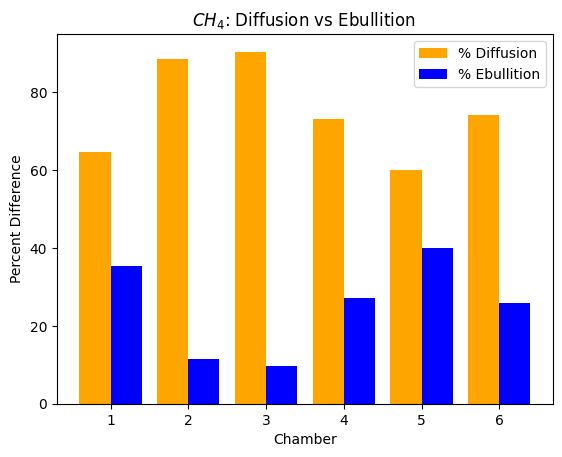

In [32]:
def plot_percent_difference(diff,ebul, title):

    diff_cumulative = diff.groupby(['pond', 'chamber']).agg({'mg_m2_d': 'sum'}).reset_index()
    ebul_cumulative = ebul.groupby(['pond', 'chamber']).agg({'mg_m2_d': 'sum'}).reset_index()

    # Calculate percent differences for d1_d2 and d2_d1
    percent_difference_d_e = (diff_cumulative['mg_m2_d'] / (diff_cumulative['mg_m2_d'] + ebul_cumulative['mg_m2_d'])) * 100
    percent_difference_e_d = (ebul_cumulative['mg_m2_d'] / (diff_cumulative['mg_m2_d'] + ebul_cumulative['mg_m2_d'])) * 100

    # Plot histogram
    width = 0.4  # Width of the bars

    # Create bar positions
    ind = np.arange(len(diff_cumulative['chamber']))

    # Plot the two series as histograms
    plt.bar(ind - width/2, percent_difference_d_e, width, label='% Diffusion', color='orange')
    plt.bar(ind + width/2, percent_difference_e_d, width, label='% Ebullition', color='blue')

    # Add labels and title
    plt.xlabel('Chamber')
    plt.ylabel('Percent Difference')
    plt.title(title)
    plt.xticks(ind, diff_cumulative['chamber'])  # Set x-ticks as chamber numbers
    plt.legend()

plot_percent_difference(ch4_diffusive_daily,ch4_ebullitive_daily, '$CH_4$: Diffusion vs Ebullition ')


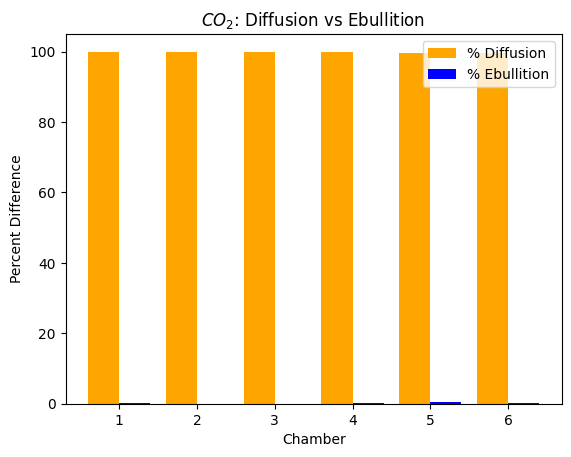

In [33]:
plot_percent_difference(co2_diffusive_daily,co2_ebullitive_daily, '$CO_2$: Diffusion vs Ebullition ')

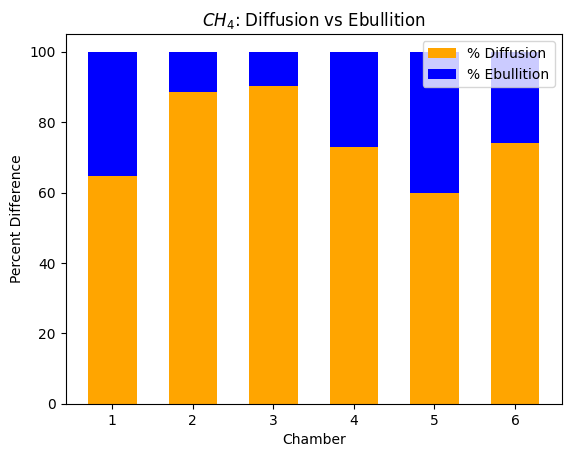

In [34]:
def plot_percent_difference_stacked(diff, ebul, title):
    # Calculate cumulative sums for diffusion and ebullition
    diff_cumulative = diff.groupby(['pond', 'chamber']).agg({'mg_m2_d': 'sum'}).reset_index()
    ebul_cumulative = ebul.groupby(['pond', 'chamber']).agg({'mg_m2_d': 'sum'}).reset_index()

    # Calculate percent differences for diffusion and ebullition
    total = diff_cumulative['mg_m2_d'] + ebul_cumulative['mg_m2_d']
    percent_difference_d_e = (diff_cumulative['mg_m2_d'] / total) * 100
    percent_difference_e_d = (ebul_cumulative['mg_m2_d'] / total) * 100

    # Create bar positions
    ind = np.arange(len(diff_cumulative['chamber']))
    width = 0.6  # Width of the bars

    # Plot the stacked bar chart
    plt.bar(ind, percent_difference_d_e, width, label='% Diffusion', color='orange')
    plt.bar(ind, percent_difference_e_d, width, bottom=percent_difference_d_e, label='% Ebullition', color='blue')

    # Add labels and title
    plt.xlabel('Chamber')
    plt.ylabel('Percent Difference')
    plt.title(title)
    plt.xticks(ind, diff_cumulative['chamber'])  # Set x-ticks as chamber numbers
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
plot_percent_difference_stacked(ch4_diffusive_daily, ch4_ebullitive_daily, '$CH_4$: Diffusion vs Ebullition')
